In [1]:
%load_ext autoreload
%autoreload 2

In [1]:
from datasets import BaseDataset, ExpertDataset, DatasetFromSubset
import transforms as tran

In [5]:
transforms = tran.Compose([
    tran.ToTensor(mask_as_integer=True),
   # tran.Resize((256, 256)),
   # tran.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)) 
])

dataset = BaseDataset('../data/', transform=transforms, with_background=True, as_id_mask=True)

In [6]:
dataset[0]

(tensor([[[0.6118, 0.6549, 0.6745,  ..., 0.3647, 0.3569, 0.3725],
          [0.6392, 0.6588, 0.7216,  ..., 0.3843, 0.3804, 0.3765],
          [0.7137, 0.7098, 0.8000,  ..., 0.3647, 0.3725, 0.3647],
          ...,
          [0.5529, 0.5020, 0.4314,  ..., 0.6745, 0.6471, 0.6078],
          [0.5725, 0.5216, 0.4588,  ..., 0.6980, 0.6784, 0.6471],
          [0.6078, 0.5529, 0.4980,  ..., 0.6627, 0.6353, 0.6078]],
 
         [[0.4039, 0.4510, 0.4745,  ..., 0.1804, 0.1725, 0.1961],
          [0.4196, 0.4510, 0.5176,  ..., 0.2000, 0.1961, 0.2000],
          [0.4863, 0.4824, 0.5765,  ..., 0.1804, 0.1882, 0.1882],
          ...,
          [0.3176, 0.2627, 0.1922,  ..., 0.4471, 0.4157, 0.3804],
          [0.3255, 0.2706, 0.2078,  ..., 0.4706, 0.4510, 0.4196],
          [0.3529, 0.2980, 0.2353,  ..., 0.4353, 0.4078, 0.3804]],
 
         [[0.6784, 0.7333, 0.7686,  ..., 0.5490, 0.5333, 0.5529],
          [0.7059, 0.7333, 0.8118,  ..., 0.5686, 0.5569, 0.5569],
          [0.7843, 0.7804, 0.8863,  ...,

(512, 512, 4)


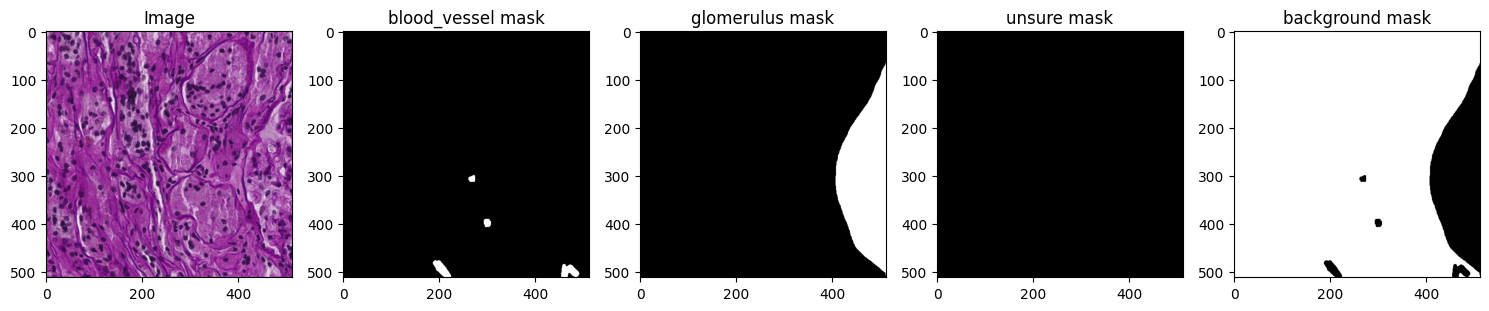

In [8]:
dataset.plot_example(5)

In [72]:
from skimage.color import label2rgb
import torch
import torchvision.transforms as T
import numpy as np
import matplotlib.pyplot as plt

In [132]:
idx = 1

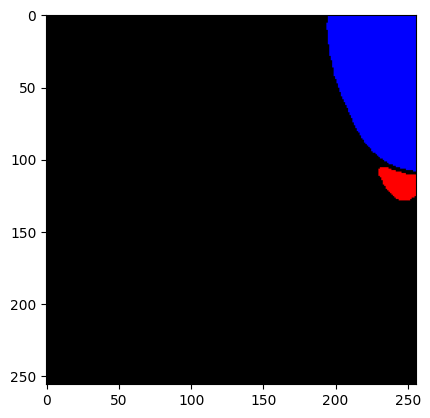

In [145]:
image, target = dataset.get(idx, transform=base_transforms)
image_np = image.permute(1, 2, 0).numpy()

target_argmax = target.argmax(dim=0)
target_np = target_argmax.numpy()

image_label_overlay = label2rgb(
    target_np,
    image=None,
    bg_label=3,
    colors=["red", "blue", "yellow"],
    kind="overlay",
    saturation=1.0,
    alpha=0.3,
)

plt.imshow(image_label_overlay)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


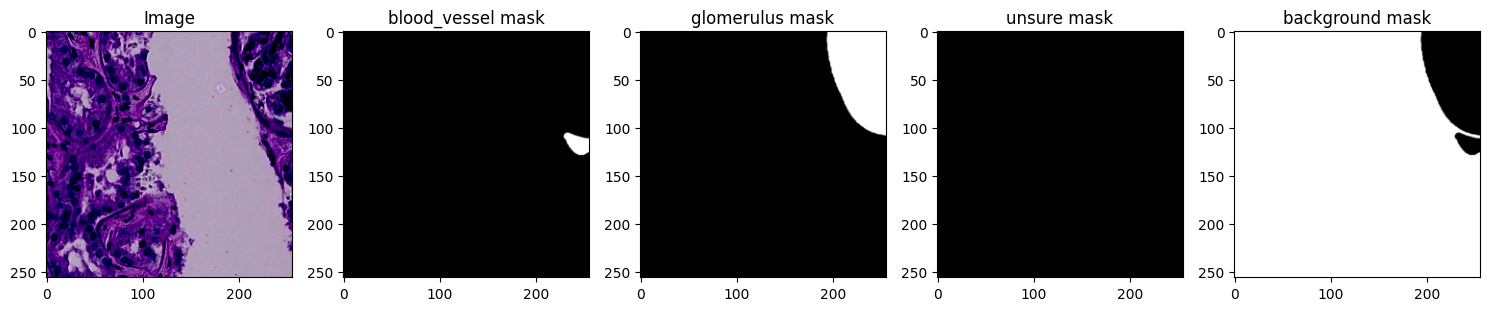

In [141]:
dataset.plot_example(idx)